In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_csv('cleaned_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

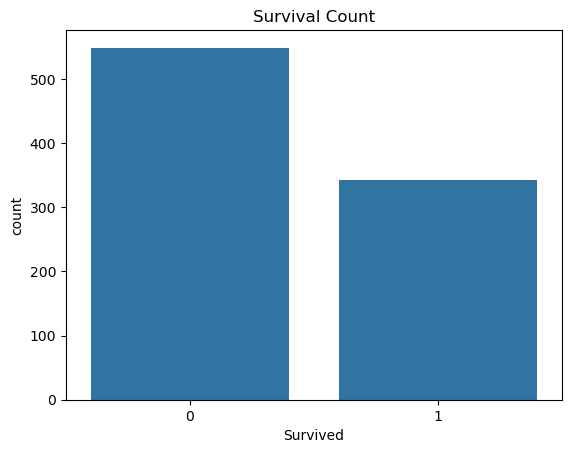

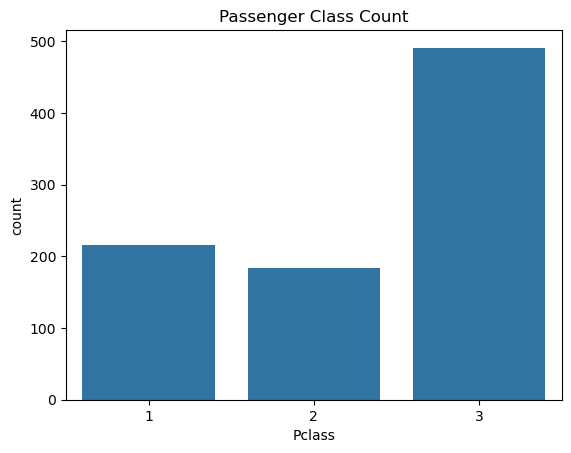

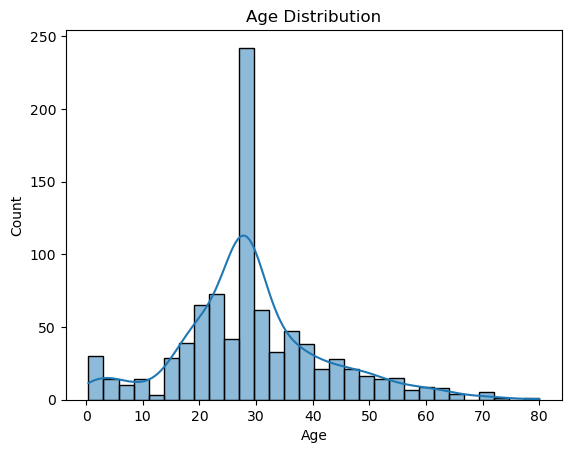

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical features
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.savefig('survival_count.png')
plt.show()

sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Count')
plt.savefig('passenger_class_count.png')
plt.show()

# Numerical feature
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.savefig('age_distribution.png')
plt.show()


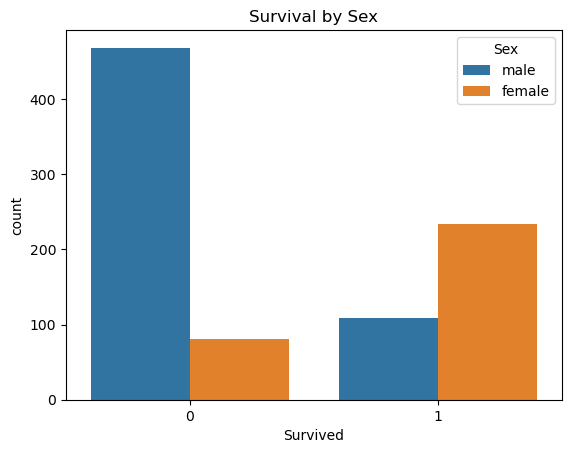

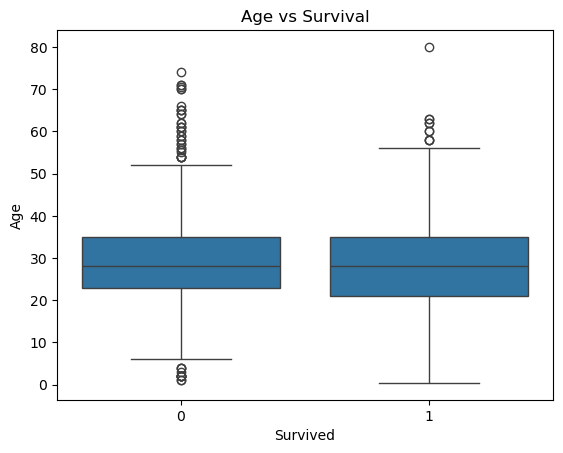

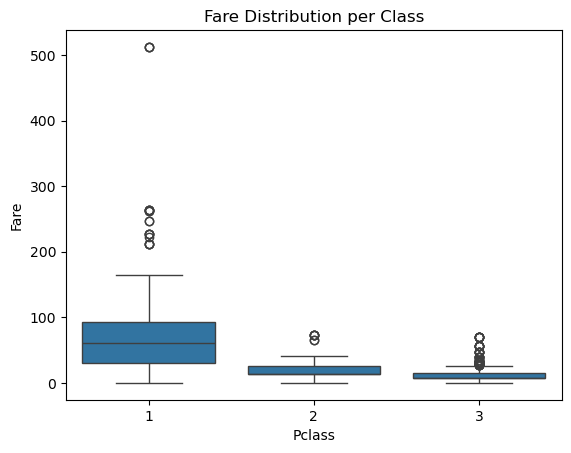

In [19]:
# Survived by Sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Sex')
plt.savefig('survival_by_sex.png') 
plt.show()

# Age distribution by survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.savefig('age_vs_survival.png') 
plt.show()

# Fare vs Class
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution per Class')
plt.savefig('fare_vs_class.png')
plt.show()


In [20]:
df_encoded = df.copy()
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

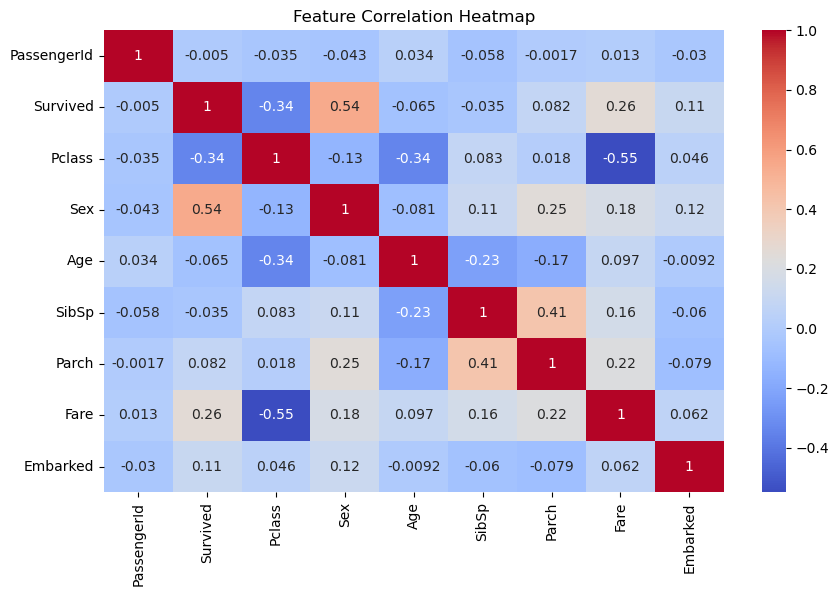

In [21]:
# Drop non-numeric columns for correlation
numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])

# Now plot the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.savefig("correlation_heatmap.png")
plt.show()
